In [1183]:
# Compare two matchms tables

In [1184]:
from prediction_utils import get_galaxy_filename
import numpy as np
import pandas as pd
from matplotlib_venn import venn2 as venn2_
import matplotlib.pyplot as plt


def venn2(*args,):
    v = venn2_(*args, set_labels = ('Predicted', 'Ground'))
    v.get_patch_by_id('100').set_color('red')
    v.get_patch_by_id('010').set_color('orange')
    v.get_patch_by_id('110').set_color('green')

In [1185]:
from prediction_utils import get_galaxy_filename

fres1 = get_galaxy_filename('3_matchms output formatter _get-thresholded-data_ on data 122', '../data', None)
fres2 = get_galaxy_filename('4_matchms output formatter _get-thresholded-data_ on data 164', 'tmp', None)

fref = get_galaxy_filename('KC_Confirmed', '../data', None)


# reference_lib = "../data/1_rcx_gc-orbitrap_metabolites_20210817.msp.msp"
# concs = ["all"]
# # if the predictions were generated in this galaxy session set to True
# is_fresh = False
# suffix = "" if is_fresh else ".txt"


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1186]:
fres1

'../data/3_matchms output formatter _get-thresholded-data_ on data 122 and data 121.tsv'

In [1187]:
ref = pd.read_csv(fref)
res1 = pd.read_csv(fres1, sep="\t", index_col=0)
res2 = pd.read_csv(fres2, sep="\t", index_col=0)

In [1188]:
len(res1.groupby("query").mean())

67

In [1189]:
len(res1), len(res2)

(2431, 2402)

In [1190]:
ground = set(ref["Metabolite name"])
# orig = set(res1.reference) 
# new = set(res2.reference) 

In [1202]:
# only set 
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference


# the top compound according to prespecified "best" criterion

# add helper collumn
res1["total"] = res1["score"]#* res1["matches"]
res2["total"] =res2["score"] #* res2["matches"]

x  = res1[((res1.matches > th_m) & (res1.score > th_s))]
x = x.reset_index()

x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
orig = x.reference


# different perspective - how much of recovered spectra were sucesfully matched?
# i sucessful mathcing is if the correct compound is matched in top 3(5) compounds sorted by score now
# the linking of detected spectra to annotations is via RT

In [1244]:
th_m = 5
th_s = 0.3

,query,reference,total
2,C02,Lysine_4TMS,0.922810
11,C06,Fructose_5TMS isomer 2,0.876681
24,C08,Citric acid_4TMS,0.874922
31,C10,Myo-inositol_6TMS,0.915567
34,C16,Uridine_4TMS isomer 1,0.602506
36,C17,Serine_3TMS,0.825573
37,C26,Threonine_3TMS spectra 1,0.796540
39,C30,Asparagine_3TMS,0.420921
40,C40,Stearic acid_1TMS,0.417295


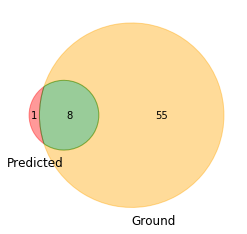

In [1245]:
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
# venn2((set(orig), ground))
# orig
#res1[((res1.matches > th_m) & (res1.score > th_s))].groupby(["query", "reference"])["total"].max()


x  = res1[((res1.matches > th_m) & (res1.score > th_s))]
x = x.reset_index()

x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
orig = x.reference


venn2((set(orig), ground))
orig
x


In [1246]:
set(orig).intersection(ground)

{'Asparagine_3TMS',
 'Citric acid_4TMS',
 'Fructose_5TMS isomer 2',
 'Lysine_4TMS',
 'Myo-inositol_6TMS',
 'Serine_3TMS',
 'Stearic acid_1TMS',
 'Threonine_3TMS spectra 1'}

,query,reference,total
3,C01,Lysine_4TMS,0.922265
12,C05,Fructose_5TMS isomer 2,0.876674
30,C09,Myo-inositol_6TMS,0.920697
33,C11,Citric acid_4TMS,0.874217
35,C18,Uridine_4TMS isomer 1,0.602503
37,C19,Serine_3TMS,0.825573
38,C21,Palmitic acid_1TMS,0.524568
40,C22,Acetylgalactosamine_5TMS isomer 1,0.452095
44,C27,Threonine_3TMS spectra 1,0.796540
46,C32,Asparagine_3TMS,0.420921


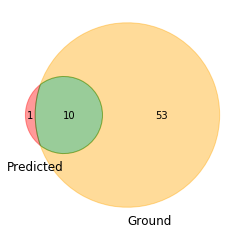

In [1247]:
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference
x  = res2[((res2.matches > th_m) & (res2.score > th_s))]
x = x.reset_index()

x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
new = x.reference


venn2((set(new), ground))
x

In [1248]:
set(new).difference(orig).intersection(ground)

{'Acetylgalactosamine_5TMS isomer 1', 'Palmitic acid_1TMS'}

In [1249]:
set(new).intersection(ground)

{'Acetylgalactosamine_5TMS isomer 1',
 'Asparagine_3TMS',
 'Citric acid_4TMS',
 'Fructose_5TMS isomer 2',
 'Lysine_4TMS',
 'Myo-inositol_6TMS',
 'Palmitic acid_1TMS',
 'Serine_3TMS',
 'Stearic acid_1TMS',
 'Threonine_3TMS spectra 1'}

In [1250]:
orig = np.zeros(shape=(20, 20))
new = orig.copy()

stat_orig = np.ones(63) * (100)
stat_new = stat_orig.copy()
for i, n_m in enumerate(range(1,21)):
    for j, n_s in enumerate(np.arange(0,1,0.05)):
        for res, grid, stat in zip([res1, res2], [orig, new], [stat_orig, stat_new]):
            p = set(res[((res.matches > n_m) & (res.score > n_s))].reference)
            
            x  = res[((res.matches > n_m) & (res.score > n_s))]
            x = x.reset_index()

            x = x.loc[x.groupby('query')['total'].idxmax(), ['query', 'reference', 'total']]
            p = set(x.reference)
            
            TP = len(p.intersection(ground))
            FP = len(p.difference(ground))
            FN = len(ground.difference(p))
            stat[TP] = min(FP, stat[TP])
            grid[i,j] = TP/(TP + 0.5*(FN+FP)) if (TP + 0.5*(FN+FP)) != 0 else 0
stat_orig[stat_orig == 100] = np.nan
stat_new[stat_new == 100] = np.nan

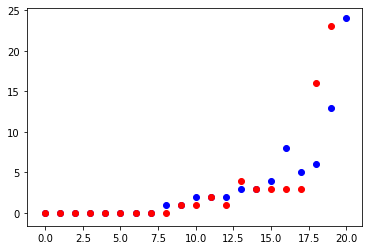

In [1251]:
plt.scatter(x=np.arange(63), y=stat_orig, color="blue")
plt.scatter(x=np.arange(63), y=stat_new, color = "red")

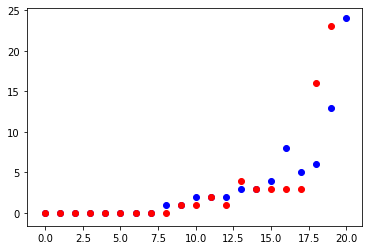

In [1252]:
plt.scatter(x=np.arange(63), y=stat_orig, color="blue")
plt.scatter(x=np.arange(63), y=stat_new, color = "red")

In [1243]:
stat_orig - stat_new

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
         0.,   1.,  -1.,   0.,   1.,   5.,   2., -10., -10.,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

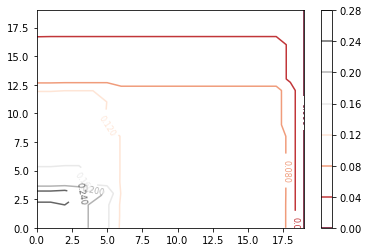

In [1055]:
c = plt.contour(new, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()

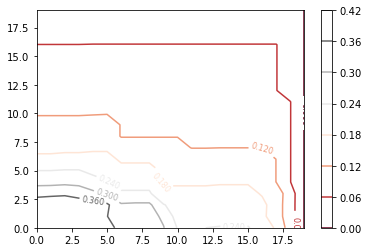

In [1056]:
c = plt.contour(orig, cmap='RdGy')
plt.clabel(c, inline=True, fontsize=8)

plt.colorbar()


In [1057]:
new.sum()

37.22375979862147

In [1058]:
orig.sum()

50.495491242887

In [1031]:
th_m, th_s = 5, 0.4
orig = res1[((res1.matches > th_m) & (res1.score > th_s))].reference
new = res2[((res2.matches > th_m) & (res2.score > th_s))].reference


In [1032]:
set(orig) -set(new)

{'Asparagine_3TMS',
 'Serine_3TMS',
 'Stearic acid_1TMS',
 'Threonine_3TMS spectra 1',
 'Threonine_3TMS spectra 2'}

In [1033]:
set(new) -set(orig)

{'Glycylvaline_4TMS'}

In [1034]:
set(new) - ground

{'2-Deoxyglucose_4TMS',
 'Acetyllysine_4TMS',
 'Galactitol_6TMS',
 'Gluconic acid-1,4-lactone',
 'Glucuro-3,6-lactone_3TMS isomer 1',
 'Glycylvaline_4TMS',
 'Isocitric acid_4TMS',
 'Spermine_derivative',
 'Uridine_4TMS isomer 1',
 'Uridine_4TMS isomer 2',
 'Xylose_4TMS'}

In [1035]:
set(orig) - ground

{'2-Deoxyglucose_4TMS',
 'Acetyllysine_4TMS',
 'Galactitol_6TMS',
 'Gluconic acid-1,4-lactone',
 'Glucuro-3,6-lactone_3TMS isomer 1',
 'Isocitric acid_4TMS',
 'Spermine_derivative',
 'Uridine_4TMS isomer 1',
 'Uridine_4TMS isomer 2',
 'Xylose_4TMS'}